In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datathon-2024/sample_submission.csv
/kaggle/input/datathon-2024/test_x.csv
/kaggle/input/datathon-2024/train.csv


In [2]:
train = pd.read_csv("/kaggle/input/datathon-2024/train.csv")
test = pd.read_csv("/kaggle/input/datathon-2024/test_x.csv")

In [3]:
train.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,Finans Yönetimi ve Pazarlama,1,NaN,Hayır,Batem,NaN,Ankara,Meslek lisesi,Elektirk,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,İlkokul Mezunu,Evet,Özel Sektör,6,Evet,Tema,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,Bilgisayar Mühendisliği,3,3.00-2.50,Hayır,Cumhuriyet Fen Lisesi,NaN,Diyarbakır,Fen lisesi,Sayısal,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,10,Evet,Güzel Konuşma ve yazma kulübü,Hayır,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,3.00-2.50,Hayır,Samanyolu Lisesi,NaN,Ankara,Özel lisesi,TM,NaN,3.00 - 4.00,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

### **Yanlış  dtype'a sahip verilerimiz var bunlar numeric olmalı:**
* **int :** Universite Kacinci Sinif , Kardes Sayisi 
* **float:** Universite Not Ortalamasi. , Lise Mezuniyet Notu ,Baska Kurumdan Aldigi Burs Miktari

Diğer sütunlarımız "O" veri tipinde

In [5]:
# Verilerimizde yanlış işlem yapmamak adına
train_copy=train.copy()
test_copy=test.copy()


## kategorik ve numeric olarak ayırıp ilerleyelim


In [6]:
# numeric features
def num_fea(df):
    num_col = [col for col in df.columns if df[col].dtype not in 
                        ['O','bool_']]
    return num_col
num_fea(train_copy)

['Basvuru Yili', 'Degerlendirme Puani', 'Burslu ise Burs Yuzdesi', 'id']

In [7]:
# yanlış dtype
numeric_temp = ['Universite Kacinci Sinif','Kardes Sayisi','Universite Not Ortalamasi',
        'Lise Mezuniyet Notu','Baska Kurumdan Aldigi Burs Miktari']

In [8]:
# categoric features
def cat_fea(df):
    cat_col = [col for col in df.columns if df[col].dtype in
                            ['O','bool'] and col not in numeric_temp]
    return cat_col
cat_fea(train_copy)

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'Ingilizce Biliyor musunuz?',
 'Ingilizce Seviyeniz?',
 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']

## Kardinal ve dololuk oranlarını inceleyelim


In [9]:
def train_filtr(categorical_features):
    train = pd.DataFrame({  
              "Kardinal Tespiti": train_copy[categorical_features].nunique(),
              "Doluluk Oranı": 100-train_copy[categorical_features].isna().mean()*100,
              "Boş veri Adeti": train_copy[categorical_features].isna().sum()
        })
    return train


train_filtr(cat_fea(train_copy))

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti
Cinsiyet,4,99.740499,169
Dogum Tarihi,13498,99.728215,177
Dogum Yeri,2230,98.785413,791
Ikametgah Sehri,319,96.872169,2037
Universite Adi,527,99.797313,132
Universite Turu,4,99.608445,255
Burs Aliyor mu?,5,100.000000,0
Bölüm,7748,99.645298,231
Daha Once Baska Bir Universiteden Mezun Olmus,2,42.656430,37345
Lise Adi,31950,99.410365,384


In [10]:
def test_filtr(categorical_features):
    test = pd.DataFrame({  
        "Kardinal Tespiti": test_copy[categorical_features].nunique(),
        "Doluluk Oranı": 100-test_copy[categorical_features].isna().mean()*100,
        "Boş veri Adeti": test_copy[categorical_features].isna().sum()
        })
    return test

test_filtr(cat_fea(test_copy))

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti
Cinsiyet,3,100.0,0
Dogum Tarihi,2135,100.0,0
Dogum Yeri,83,100.0,0
Ikametgah Sehri,83,100.0,0
Universite Adi,203,100.0,0
Universite Turu,2,100.0,0
Burs Aliyor mu?,2,100.0,0
Bölüm,349,100.0,0
Lise Adi,7830,100.0,0
Lise Sehir,83,100.0,0


## Veriseti içerisindeki bütün değerleri küçük harfe çevirme

In [11]:
def lower(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)

lower(train_copy)
lower(test_copy)

# Tutarsız Verilerin Düzenlenmesi ve Doldurulması

## Dogum Tarihi Düzenlenmesi

In [12]:
import re
# Ayların karşılık gelen sayıları
months = {
    'ocak': '1', 'şubat': '2', 'mart': '3', 'nisan': '4', 
    'mayıs': '5', 'haziran': '6', 'temmuz': '7', 'ağustos': '8', 
    'eylül': '9', 'ekim': '10', 'kasım': '11', 'aralık': '12',
    'january': '1', 'february': '2', 'march': '3', 'april': '4',
    'may': '5', 'june': '6', 'july': '7', 'august': '8',
    'september': '9', 'october': '10', 'november': '11', 'december': '12',
    'jan': '1', 'feb': '2', 'apr': '4', 'jun': '6', 'jul': '7', 'aug': '8',
    'sep': '9', 'oct': '10', 'nov': '11', 'dec': '12'
}
# Farklı Türkçe harf varyasyonlarını dikkate alacak bir mapping
char_map = {
    's': '[sş]', 'i': '[iı]', 'c': '[cç]', 'o': '[oö]', 
    'u': '[uü]', 'g': '[gğ]', 'a': '[aâ]', 'e': '[eê]'
}

# Ay isimlerini değiştirme fonksiyonu
def replace_month_names(text):
    if pd.isna(text):
        return text  # Eğer boş veya NaN ise, olduğu gibi döndür
    for month, num in months.items():
        # Her ay ismi için harf varyasyonlarını dikkate alarak regex deseni oluştur
        pattern = month
        for char, regex in char_map.items():
            pattern = pattern.replace(char, regex)
        
        # Bulunan ay isimlerini sayılarla değiştir
        text = re.sub(pattern, num, text, flags=re.IGNORECASE)
    return text



# Test edilecek DataFrame'deki "Dogum Tarihi" sütunu
train_copy["Dogum_Tarihi"] = train_copy["Dogum Tarihi"].astype(str)  # Eğer değerler string değilse, stringe çevir
test_copy["Dogum_Tarihi"] = test_copy["Dogum Tarihi"].astype(str)
train_copy["Dogum_Tarihi"] = train_copy["Dogum_Tarihi"].apply(replace_month_names)

In [13]:
# Tarih ve saat formatını istediğiniz şekilde düzenleyen fonksiyon
def replace_with_limited_slash(text):
    if pd.isna(text):
        return text  # NaN değerleri olduğu gibi bırak
    
    # Önce tüm ardışık işaretleri ve boşlukları '/' ile değiştir
    replaced_text = re.sub(r'[^\w]+', '/', text)
    
    # Şimdi doğru formatta olacak şekilde değişiklikler yapalım
    # İlk önce tarih kısmını düzenleyelim: 23/10/1999/00/00 şeklinde olabilir
    # 23/10/1999 00 00 şeklinde düzenleyelim
    parts = replaced_text.split('/')
    
    if len(parts) >= 5:  # Tarih ve saat kısmı mevcutsa
        # Parçaları tekrar birleştirerek istenen formata çevirelim
        result = f"{parts[0]}/{parts[1]}/{parts[2]} {parts[3]} {parts[4]}"
    else:
        result = replaced_text  # Eğer format beklenenden farklıysa olduğu gibi bırak
    
    return result



# DataFrame'deki 'Dogum Tarihi' sütununa işlemi uygulama
train_copy['Dogum_Tarihi'] = train_copy['Dogum_Tarihi'].apply(replace_with_limited_slash)
test_copy['Dogum_Tarihi'] = test_copy['Dogum_Tarihi'].apply(replace_with_limited_slash)

In [14]:
# Boşluktan sonrasını silen fonksiyon
def remove_after_space(text):
    if pd.isna(text):
        return text  # NaN değerleri olduğu gibi bırak
    return text.split(' ')[0]  # Boşluğa göre böl ve ilk kısmı döndür


# DataFrame'deki 'Dogum Tarihi' sütununa işlemi uygulama
train_copy['Dogum_Tarihi'] = train_copy['Dogum_Tarihi'].apply(remove_after_space)
test_copy['Dogum_Tarihi'] = test_copy['Dogum_Tarihi'].apply(remove_after_space)

In [15]:

# Yıl kısmını alacak fonksiyon
def extract_year(text):
    if pd.isna(text):
        return text  # NaN değerleri olduğu gibi bırak
    
    # Regex ile yıl kısmını bul (tarihin sonundaki 2 ya da 4 rakamdan oluşan kısım)
    match = re.search(r'\b(\d{2}|\d{4})\b$', text)
    
    if match:
        # Bulunan yıl kısmını döndür
        return match.group(0)
    else:
        return None  # Eğer eşleşme yoksa None döndür


# DataFrame'deki 'Dogum Tarihi' sütununa işlemi uygulama
train_copy["Dogum_yili"] = train_copy["Dogum_Tarihi"].apply(extract_year)
test_copy['Dogum_yili'] = test_copy['Dogum_Tarihi'].apply(extract_year)

In [16]:
# Liste içerisindeki değerleri 22'ye göre 2000 veya 1900 ile toplayan fonksiyon
def adjust_year_based_on_value(value):
    if value < 22:
        return value + 2000
    elif value >= 22 and value < 100:
        return value + 1900
    return value  # Eğer 100'den büyükse orijinal değeri döndür

# 'Dogum_yili' sütununu float'a çevirme
train_copy["Dogum_yili"] = train_copy["Dogum_yili"].astype(float)

# 'Dogum_yili' sütununa fonksiyonu uygulama
train_copy["Dogum_yili"] = train_copy["Dogum_yili"].apply(adjust_year_based_on_value)




In [17]:
train_copy["Dogum_yili"].describe()

count    64868.000000
mean      1996.591416
std         88.604317
min       1155.000000
25%       1995.000000
50%       1998.000000
75%       2000.000000
max       9951.000000
Name: Dogum_yili, dtype: float64

### Dogum_Tarihi ve Dogun Tarihi sütunlarını silelim

In [18]:
train_copy.drop(["Dogum Tarihi", "Dogum_Tarihi"] , axis = 1 , inplace = True)
test_copy.drop(["Dogum Tarihi", "Dogum_Tarihi"] , axis = 1 , inplace = True)

### Yaş sütunu elde edelim

In [19]:
# Train
train_copy["Yas"] = train_copy["Basvuru Yili"] - train_copy["Dogum_yili"]
train_copy["Yas"] = train_copy["Yas"].apply(lambda x: x if x >= 18 else np.nan) 

# Test
test_copy["Yas"] = test_copy["Basvuru Yili"] - train_copy["Dogum_yili"]
test_copy["Yas"] = test_copy["Yas"].apply(lambda x: x if x >= 18 else np.nan)

# 18 yaş altını bilerek nan yaptık üni kaçıncı sınıfta dolduracağız.
# 50 üstü yaş grubunu outlier'da bakarız duruma göre  

In [20]:
train_copy.loc[train_copy["Yas"]>51,"Yas"].value_counts().sum()

1472


## Universite Kacinci Sinif  düzenlenmesi

In [21]:
train_copy["Universite Kacinci Sinif"].replace({
    'hazırlık': '0', 
    'yüksek lisans': '6',
    'mezun':'5',
    'tez': '6'},inplace = True)
test_copy["Universite Kacinci Sinif"].replace('hazırlık', '0' , inplace = True)

# astype
train_copy["Universite Kacinci Sinif"] = train_copy["Universite Kacinci Sinif"].astype(float)
test_copy["Universite Kacinci Sinif"] = test_copy["Universite Kacinci Sinif"].astype(float)

## Yaş değerlerini doldurma

In [22]:
# Train
train_copy.loc[train_copy["Yas"].isna(), "Yas"] = 18 + train_copy["Universite Kacinci Sinif"]
# kalan 17 değeri median ile dolduralım.
train_copy["Yas"].fillna(train_copy["Yas"].median(), inplace = True)

# Test
test_copy.loc[test_copy["Yas"].isna(), "Yas"] = 18 + train_copy["Universite Kacinci Sinif"]
# kalan 17 değeri median ile dolduralım.
test_copy["Yas"].fillna(test_copy["Yas"].median(), inplace = True)

In [23]:
# threshold belirleme
test_copy["Yas"].value_counts() , train_copy["Yas"].value_counts()
threshold = 54

In [24]:
# 54 yaşından büyükleri medyan ile doldurma
train_copy.loc[train_copy["Yas"]>=  threshold , "Yas"] = train_copy["Yas"].median()
test_copy.loc[test_copy["Yas"]>=  threshold , "Yas"] = test_copy["Yas"].median()

## Cinsiyet Düzenlenmesi

In [25]:
train_copy["Cinsiyet"].replace(['belirtmek istemiyorum',np.nan], 'kadın',inplace = True)
test_copy["Cinsiyet"].replace('belirtmek istemiyorum', 'kadın',inplace = True)

## Universite Turu Düzenlenmesi

In [26]:
train_copy.loc[train_copy["Universite Turu"] =="devlet",["Universite Adi" , "Burslu ise Burs Yuzdesi"]][:10]

,Universite Adi,Burslu ise Burs Yuzdesi
224,uludağ üni̇versi̇tesi̇,100.0
237,gi̇resun üni̇versi̇tesi̇,100.0
382,osmani̇ye korkut ata üni̇versi̇tesi̇,100.0
477,amasya üni̇versi̇tesi̇,100.0
544,kocaeli̇ üni̇versi̇tesi̇,100.0
809,anadolu üni̇versi̇tesi̇,100.0
960,i̇stanbul üni̇versi̇tesi̇,100.0
1079,hacettepe üni̇versi̇tesi̇,100.0
1160,recep tayyi̇p erdoğan üni̇versi̇tesi̇,100.0
1176,çukurova üni̇versi̇tesi̇,100.0


In [27]:
train_copy["Universite Turu"].fillna(train_copy["Universite Turu"].mode()[0] , inplace = True)


## Burs Aliyor mu? Düzenlenmesi

In [28]:
train_copy.loc[(train_copy["Burslu ise Burs Yuzdesi"] == 0) & (train_copy["Burs Aliyor mu?"] == "evet")
               , "Burs Aliyor mu?"] = "hayır"
train_copy.loc[(train_copy["Burslu ise Burs Yuzdesi"] > 0) & (train_copy["Burs Aliyor mu?"] == "hayır")
               , "Burs Aliyor mu?"] = "evet"

## Universite Kacinci Sinif Doldurulması

In [29]:
train_copy["Universite Kacinci Sinif"].fillna(train_copy["Universite Kacinci Sinif"].median() ,
                                              inplace = True)

## Universite Not Ortalamasi Düzenlenmesi

In [30]:
train_copy["Universite Not Ortalamasi"].replace({
    'hazırlığım':'az',
    'not ortalaması yok': 'az',
    'ortalama bulunmuyor': 'az',
    '0 - 1.79':'az',
    '1.00 - 2.50': 'az',
    '1.80 - 2.49': 'orta az',
    '2.00 - 2.50': 'orta az',
    '2.50 ve altı': 'orta az',
    '2.50 - 2.99': 'orta',
    '2.50 - 3.00': 'orta',
    '2.50 -3.00': 'orta',
    '3.00-2.50': 'orta',
    '3.00 - 3.49': 'iyi',
    '3.00 - 3.50': 'iyi',
    '3.50-3': 'iyi',
    '3.00 - 4.00':'çok iyi',
    '3.50 - 4.00':'çok iyi',
    '4-3.5':'çok iyi',
    '4.0-3.5':'çok iyi'    
} , inplace = True)

test_copy["Universite Not Ortalamasi"].replace({
    'hazırlığım': 'az',
    '0 - 1.79': 'az',
    '1.80 - 2.49': 'orta az',
    '2.50 - 2.99' : 'orta',
    '3.00 - 3.49' : 'iyi',
    '3.50 - 4.00' : 'çok iyi'
} , inplace = True)

train_copy["Universite Not Ortalamasi"].fillna(train_copy["Universite Not Ortalamasi"].mode()[0],
                                             inplace = True)
test_copy["Universite Not Ortalamasi"].fillna(test_copy["Universite Not Ortalamasi"].mode()[0],
                                             inplace = True)

## Lise Turu Düzenlenmesi


In [31]:
train_copy["Lise Turu"].replace({
    'anadolu lisesi': 'devlet',
    'meslek lisesi' : 'devlet',
    'fen lisesi' : 'devlet',
    'özel lisesi' : 'özel',
    'i̇mam hatip lisesi' : 'devlet',
    'özel lise' : 'özel',
    'diğer' : 'özel',
    'özel' : 'özel',
    'meslek' : 'devlet',
    'düz lise' : 'devlet'
}, inplace = True)
train_copy["Lise Turu"].fillna(train_copy["Lise Turu"].mode()[0] , inplace = True)

## Lise Bolumu Düzenlenmesi

In [32]:
# Genişletilmiş anahtar kelimeler listesi
sayisal_keywords = [
    'mf', 'sayısal', 'fen', 'matematik fen', 'matematik-fen', 
    'fen-matematik', 'fen bilimleri', 'matematik/fen', 'mat-fen', 'sayısal fen', 'fen ağırlıklı',
    'fizik', 'kimya', 'biyoloji', 'matematik','imam', 'teknoloji', 'bilişim', 'grafik', 'turizm', 'bilgisayar', 'çocuk gelişimi', 
    'otomasyon', 'meslek', 'elektrik', 'makina', 'sanat', 'muhasebe', 'elektronik', 'motor',
    'harita', 'gemi', 'moda', 'endüstriyel', 'lojistik', 'tasarım', 'sekreterlik', 'kimya teknolojisi'
]
sozel_keywords = [
    'sözel', 'sosyal', 'sözel bölüm', 'türkçe-sosyal', 'tarih', 'coğrafya', 
    'edebiyat', 'sosyal bilimler', 'sosyoloji', 'felsefe', 'radyo', 'tv', 'sinema'
]
esit_agirlik_keywords = [
    'eşit', 'tm', 'eşit ağırlık', 'turkce matematik', 'türkçe-matematik', 
    'eşit ağirlik', 'eşitağırlık', 'eşit agırlık', 'ea', 'eşit ağılık', 'türkçe mateatik'
]
dil_keywords = [
    'yabancı dil', 'dil', 'yabanci dil', 'ingilizce', 'almanca', 'fransızca', 
    'yabancı dil bölümü', 'yabancı dil ağırlıklı', 'dil alani'
]


# Fonksiyonu güncelleyerek bu anahtar kelimeleri kullanacağız
def categorize_lise_turu(lise_bolumu):
    lise_bolumu = str(lise_bolumu)
    if any(keyword in lise_bolumu for keyword in sayisal_keywords):
        return 'sayısal'
    elif any(keyword in lise_bolumu for keyword in sozel_keywords):
        return 'sözel'
    elif any(keyword in lise_bolumu for keyword in esit_agirlik_keywords):
        return 'eşit ağırlık'
    elif any(keyword in lise_bolumu for keyword in dil_keywords):
        return 'dil'


# Lise türü sütununu yeni kategorilere dönüştürüyoruz
train_copy['Lise Bolumu']= train_copy['Lise Bolumu'].apply(categorize_lise_turu)


# Sonuçları kontrol et
print(train_copy['Lise Bolumu'].value_counts())

train_copy['Lise Bolumu'].fillna(train_copy['Lise Bolumu'].mode()[0] , inplace = True )

Lise Bolumu
sayısal         35750
eşit ağırlık    18119
sözel            4229
dil              1329
Name: count, dtype: int64


## Lise Mezuniyet Notu Düzenlenmesi

In [33]:
train_copy["Lise Mezuniyet Notu"].replace({
    '0 - 24': 'kaldı',
    '0 - 25': 'kaldı',
    '25 - 49': 'kaldı',
    '44-0': 'kaldı',
    '25 - 50': 'kaldı',
    'not ortalaması yok': 'kaldı',
    '54-45': 'orta',
    '2.50 ve altı': 'orta',
    '50 - 74': 'orta',
    '69-55': 'orta',
    '3.00-2.50': 'orta',
    '50 - 75': 'orta',
    '3.50-3': 'iyi',
    '3.50-3.00': 'iyi',
    '3.00 - 4.00': 'iyi',
    '84-70':'iyi',
    '4.00-3.50': 'iyi',
    '100-85': 'iyi',
    '75 - 100': 'iyi'
}, inplace = True)

# Kaldı değerleri ile üni sütunları arasında filtrelemeler yaptığımızda
# ünide okuyor fakat lisede kaldı şeklinde sonuçlar çıkıyordu ve çok az sayıda değerler mevcuttu 
# kaldı olarak kodladıklarımızı mode ile dolduracağız.

test_copy["Lise Mezuniyet Notu"].replace({
    '25 - 49': 'kaldı',
    '50 - 74': 'orta',
    '75 - 100': 'iyi'
}, inplace = True)


In [34]:
train_copy.loc[(train_copy["Lise Mezuniyet Notu"]== "kaldı") | (train_copy["Lise Mezuniyet Notu"].isna())
               ,"Lise Mezuniyet Notu"]

1210       NaN
1211       NaN
1212       NaN
1213       NaN
1214       NaN
         ...  
57416      NaN
57425      NaN
59925    kaldı
63668    kaldı
64244    kaldı
Name: Lise Mezuniyet Notu, Length: 5954, dtype: object

In [35]:
train_copy.loc[(train_copy["Lise Mezuniyet Notu"]== "kaldı") | (train_copy["Lise Mezuniyet Notu"].isna())
               ,"Lise Mezuniyet Notu"] = train_copy["Lise Mezuniyet Notu"].mode()[0]
test_copy.loc[test_copy["Lise Mezuniyet Notu"]== "kaldı","Lise Mezuniyet Notu"] = test_copy["Lise Mezuniyet Notu"].mode()[0]


## Baska Bir Kurumdan Burs Aliyor mu? Düzenlenmesi

In [36]:
train_copy.loc[(train_copy["Baska Kurumdan Aldigi Burs Miktari"].notna()) |
               (train_copy["Burs Aldigi Baska Kurum"].notna()) , "Baska Bir Kurumdan Burs Aliyor mu?"].unique()

# nan değer olmadığı için mode ile dolduralım

array(['evet', 'hayır'], dtype=object)

In [37]:
train_copy["Baska Bir Kurumdan Burs Aliyor mu?"].fillna(train_copy["Baska Bir Kurumdan Burs Aliyor mu?"].mode()[0],
                                                       inplace = True)

## Anne Egitim Durumu

In [38]:
train_copy["Anne Egitim Durumu"].replace({
    'üniversite': 'üniversite',
    'i̇lkokul mezunu': 'i̇lkokul',
    'eğitim yok' : 'eğitimi yok',
    'lise' : 'lise',
    'ortaokul mezunu': 'ortaokul',
    'yüksek lisans / doktora': 'yüksek lisans',
    'üniversite mezunu' : 'üniversite',
    'lise mezunu' : 'lise',
    'yüksek lisans / doktara' :'doktora',
    'li̇se' : 'lise',
    'eği̇ti̇m yok': 'eğitimi yok',
    'üni̇versi̇te': 'üniversite',
    'doktora':'doktora',
    'yüksek li̇sans': 'yüksek lisans',
    'ortaokul' : 'ortaokul',
    'i̇lkokul':'i̇lkokul',
    'yüksek lisans': 'yüksek lisans',
    'eğitimi yok' : 'eğitimi yok'
}, inplace = True)

train_copy["Anne Egitim Durumu"].fillna(train_copy["Anne Egitim Durumu"].mode()[0],inplace = True)

## Anne Calisma Durumu

In [39]:
# Anne Sektor sütununda "0" ve "-" olmayan değerler için "Anne Calisma Durumu" doldurma
train_copy.loc[~train_copy["Anne Sektor"].isin(["0", "-"]), "Anne Calisma Durumu"]= "evet"
train_copy.loc[train_copy["Anne Sektor"].isin(["0", "-"]), "Anne Calisma Durumu"]= "hayır"



## Baba Egitim Durumu

In [40]:
train_copy["Baba Egitim Durumu"].replace({
    'üniversite': 'üniversite',
    'yüksek lisans / doktora' : 'yüksek lisans',
    'i̇lkokul mezunu': 'i̇lkokul',
    'ortaokul mezunu' : 'ortaokul',
    'lise' : 'lise',
    'eğitim yok' : 'eğitimi yok',
    '0' : 'eğitimi yok',
    'üniversite mezunu' : 'üniversite',
    'lise mezunu' : 'lise',
    'yüksek lisans / doktara' : 'doktora',
    'üni̇versi̇te' : 'üniversite',
    'eği̇ti̇m yok': 'eğitimi yok',
    'li̇se' : 'lise',
    'yüksek li̇sans' : 'yüksek lisans',
    'doktora' : 'doktora',
    'i̇lkokul' : 'i̇lkokul',
    'ortaokul' : 'ortaokul',
    'yüksek lisans' : 'yüksek lisans',
    'eğitimi yok' : 'eğitimi yok'
}, inplace = True)
train_copy["Baba Egitim Durumu"].fillna(train_copy["Baba Egitim Durumu"].mode()[0],inplace = True)

## Baba Calisma Durumu

In [41]:
# Anne Sektor sütununda "0" ve "-" olmayan değerler için "Anne Calisma Durumu" doldurma
train_copy.loc[~train_copy["Baba Sektor"].isin(["0", "-"]), "Baba Calisma Durumu"]= "evet"
train_copy.loc[train_copy["Baba Sektor"].isin(["0", "-"]), "Baba Calisma Durumu"]= "hayır"



## Kardes Sayisi Düzenlenmesi


In [42]:
train_copy["Kardes Sayisi"] = pd.to_numeric(train_copy["Kardes Sayisi"], errors='coerce')
train_copy["Kardes Sayisi"].replace([6.0, 10.0, 5.0, 7.0,  8.0, 11.0,  9.0, 12.0, 13.0, 18.0, 14.0]
                                    , 4.0,inplace= True)


## Aile Eğitim Durumu

In [43]:

def aile_egitim_durumu(df):
    if df['Anne Egitim Durumu'] == df['Baba Egitim Durumu']:
        return df['Anne Egitim Durumu'] 
    else:
        return f"{df['Anne Egitim Durumu']}-{df['Baba Egitim Durumu']}"
train_copy['Aile Egitim Durumu'] = train_copy.apply(aile_egitim_durumu, axis=1)
test_copy['Aile Egitim Durumu'] = test_copy.apply(aile_egitim_durumu, axis=1)


## Kardeş Sayısı Doldurulması

In [44]:
# 'Aile Egitim Durumu'na göre gruplama yaparak 'Kardes Sayisi' sütununun medyan değerini hesaplıyoruz
median_kardes_sayisi_by_aile_egitim = train_copy.groupby('Aile Egitim Durumu')['Kardes Sayisi'].median()

# Her satır için işlem yapıyoruz ve 'Kardes Sayisi' boşsa ilgili 'Aile Egitim Durumu' grubunun medyanı ile dolduruyoruz
train_copy['Kardes Sayisi'] = train_copy.apply(
    lambda row: median_kardes_sayisi_by_aile_egitim.get(row['Aile Egitim Durumu'], train_copy['Kardes Sayisi'].median()) 
    if pd.isnull(row['Kardes Sayisi']) else row['Kardes Sayisi'],
    axis=1
)


## Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?

In [45]:
# 'Girisimcilikle Ilgili Deneyiminiz Var Mi?' sütununa göre 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' sütununun modunu (en sık görülen değer) bulma
mod_kulup_uyeligi_by_girisimcilik = train_copy.groupby('Girisimcilikle Ilgili Deneyiminiz Var Mi?')['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Hayır')

# Boş olan 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?' değerlerini doldurma
train_copy['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'] = train_copy.apply(
    lambda row: mod_kulup_uyeligi_by_girisimcilik.get(row['Girisimcilikle Ilgili Deneyiminiz Var Mi?'], 'hayır') 
    if pd.isnull(row['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?']) else row['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'],
    axis=1
)


## Profesyonel Bir Spor Daliyla Mesgul musunuz?

In [46]:
# Doldurulacak sütun: 'Profesyonel Bir Spor Daliyla Mesgul musunuz?'
# İlişkili sütun: 'Spor Dalindaki Rolunuz Nedir?'

# Boş olan 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' değerlerini,
# 'Spor Dalindaki Rolunuz Nedir?' sütununa göre doldurma:
# Eğer 'Spor Dalindaki Rolunuz Nedir?' boş değilse 'Evet', boşsa NaN olarak dolduracağız.

train_copy['Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = train_copy.apply(
    lambda row: 'evet' if pd.notnull(row['Spor Dalindaki Rolunuz Nedir?']) else np.nan
    if pd.isnull(row['Profesyonel Bir Spor Daliyla Mesgul musunuz?']) else row['Profesyonel Bir Spor Daliyla Mesgul musunuz?'],
    axis=1
)



In [47]:
# 'Profesyonel Bir Spor Daliyla Mesgul musunuz?' sütununda değeri 'Evet' ve NaN olan satırları görüntülemek için
train_copy.loc[
    (train_copy['Spor Dalindaki Rolunuz Nedir?'].notna()) | 
    (train_copy['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].isna()), 
    'Profesyonel Bir Spor Daliyla Mesgul musunuz?'] = "evet"


## Aktif olarak bir STK üyesi misiniz?

In [48]:

train_copy.loc[(train_copy["Aktif olarak bir STK üyesi misiniz?"].isna()) &
               ((train_copy["Hangi STK'nin Uyesisiniz?"].notna())|
               (train_copy["Stk Projesine Katildiniz Mi?"].notna()))
               , "Aktif olarak bir STK üyesi misiniz?"] = "evet"

In [49]:
train_copy["Aktif olarak bir STK üyesi misiniz?"].fillna(train_copy["Aktif olarak bir STK üyesi misiniz?"].mode()[0],
                                                        inplace = True)

## Girisimcilikle Ilgili Deneyiminiz Var Mi?

In [50]:
train_copy.loc[
    (train_copy["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].isna()) &
    ((train_copy["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"]=="evet") |
    (train_copy["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].notna())),
    "Girisimcilikle Ilgili Deneyiminiz Var Mi?"] = "evet"

train_copy.loc[
    (train_copy["Girisimcilikle Ilgili Deneyiminiz Var Mi?"].isna()) &
    ((train_copy["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"]=="hayır") |
    (train_copy["Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?"].isna())),
    "Girisimcilikle Ilgili Deneyiminiz Var Mi?"] = "hayır"



## Ingilizce Biliyor musunuz?

In [51]:
train_copy.loc[
    (train_copy["Ingilizce Biliyor musunuz?"].isna()) &
    (train_copy["Ingilizce Seviyeniz?"].notna()),
    "Ingilizce Biliyor musunuz?"] = "evet"

train_copy.loc[
    (train_copy["Ingilizce Biliyor musunuz?"].isna()) &
    (train_copy["Ingilizce Seviyeniz?"].isna()),
    "Ingilizce Biliyor musunuz?"] = "hayır"



In [52]:
train_copy["Degerlendirme Puani"].fillna(train_copy["Degerlendirme Puani"].median(),
                                         inplace = True)

# Kesin silinmesi gereken sütunlar
**Bu sütunlar silindikten sonra geri kalan kolonları (kardinal veya az veri) incelememiz lazım**

# Delete Columns

In [53]:
# Kesin silinmesi gereken sütunlar
train_filtre_cat = train_filtr(cat_fea(train_copy))
train_filtre_num = train_filtr(num_fea(train_copy))

train_delete_cat = train_filtre_cat[(train_filtre_cat["Kardinal Tespiti"]>50) | (train_filtre_cat["Doluluk Oranı"]<70)]
train_delete_cat

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti
Dogum Yeri,1743,98.785413,791
Ikametgah Sehri,260,96.872169,2037
Universite Adi,526,99.797313,132
Bölüm,6411,99.645298,231
Daha Once Baska Bir Universiteden Mezun Olmus,2,42.656430,37345
Lise Adi,25705,99.410365,384
Lise Adi Diger,3653,7.267562,60392
Lise Sehir,684,98.381574,1054
Lise Bolum Diger,709,2.343186,63599
Burs Aldigi Baska Kurum,3375,32.472937,43977


In [54]:
train_delete_num = train_filtre_num[(train_filtre_num["Kardinal Tespiti"]>100) | (train_filtre_num["Doluluk Oranı"]<50)]
train_delete_num

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti
Burslu ise Burs Yuzdesi,51,34.456814,42685
id,65125,100.000000,0


In [55]:
test_filtre_cat = test_filtr(cat_fea(test_copy))
test_delete_cat = test_filtre_cat[(test_filtre_cat["Kardinal Tespiti"]==0) | (test_filtre_cat["Doluluk Oranı"]<50)]
test_delete_cat

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti


In [56]:
test_filtre_num = test_filtr(num_fea(test_copy))

test_delete_num = test_filtre_num[(test_filtre_num["Kardinal Tespiti"]>100) | (test_filtre_num["Doluluk Oranı"]<50)]
test_delete_num

,Kardinal Tespiti,Doluluk Oranı,Boş veri Adeti
Burslu ise Burs Yuzdesi,0,0.0,11049
Daha Once Baska Bir Universiteden Mezun Olmus,0,0.0,11049
Lise Adi Diger,0,0.0,11049
Lise Bolum Diger,0,0.0,11049
Uye Oldugunuz Kulubun Ismi,0,0.0,11049
Stk Projesine Katildiniz Mi?,0,0.0,11049
Ingilizce Seviyeniz?,0,0.0,11049
"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",0,0.0,11049
id,11049,100.0,0


In [57]:
delete = list(set(train_delete_cat.index) | set(train_delete_num.index)
             | set(test_delete_cat.index) | set(test_delete_num.index))
delete

['Lise Adi Diger',
 'Baba Sektor',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite',
 'Bölüm',
 'Universite Adi',
 'Anne Sektor',
 'Burs Aldigi Baska Kurum',
 'Lise Bolum Diger',
 'Burslu ise Burs Yuzdesi',
 'Dogum Yeri',
 'id',
 'Stk Projesine Katildiniz Mi?',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Ikametgah Sehri',
 "Hangi STK'nin Uyesisiniz?",
 'Spor Dalindaki Rolunuz Nedir?',
 'Ingilizce Seviyeniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Lise Adi',
 'Lise Sehir']

In [58]:

train_copy.drop(delete , axis = 1 , inplace = True)
test_copy.drop(delete , axis = 1 , inplace = True)
train_copy.drop(["Baska Kurumdan Aldigi Burs Miktari" , "Dogum_yili"] ,axis = 1 , inplace = True)
test_copy.drop(["Baska Kurumdan Aldigi Burs Miktari" , "Dogum_yili"] ,axis = 1 , inplace = True)

In [59]:
train_copy.to_csv('clean_train.csv', index=False)
test_copy.to_csv('clean_test.csv', index=False)


In [60]:
train_clean =pd.read_csv('clean_train.csv')
test_clean =pd.read_csv('clean_test.csv')

## Dağılım Görselleştirmesi


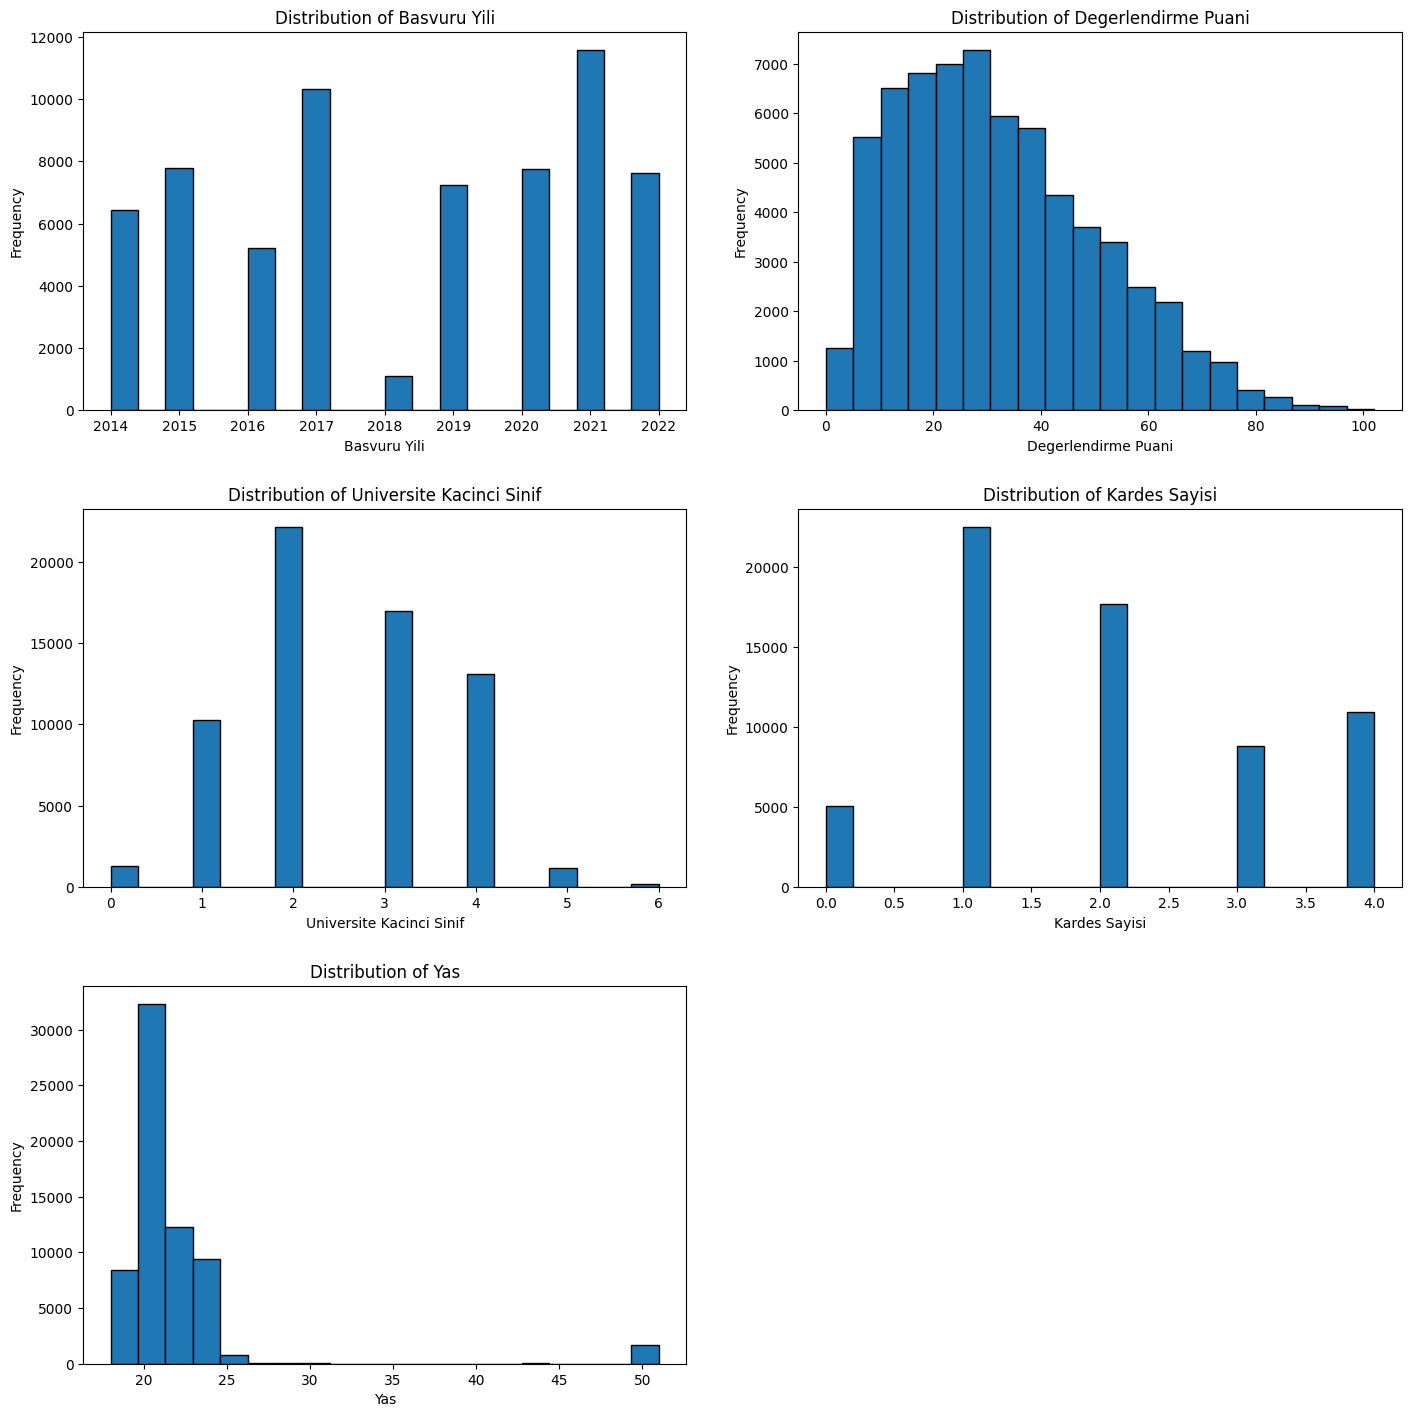

In [61]:
# Sayısal sütunların dağılımını 3x2 şeklinde görselleştirelim
numeric_columns = train_clean.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = train_clean.select_dtypes(include=['object']).columns

rows, cols = 3, 2  # 3 satır ve 2 sütun olarak ayarlayalım
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Düzgün yerleşim için numeric_columns'ı 3x2'ye böl
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, cols)
    axes[row, col].hist(train_clean[column].dropna(), bins=20, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Kalan boş grafiklere boş eksen atayalım
for j in range(i + 1, rows * cols):
    row, col = divmod(j, cols)
    fig.delaxes(axes[row, col])

plt.show()


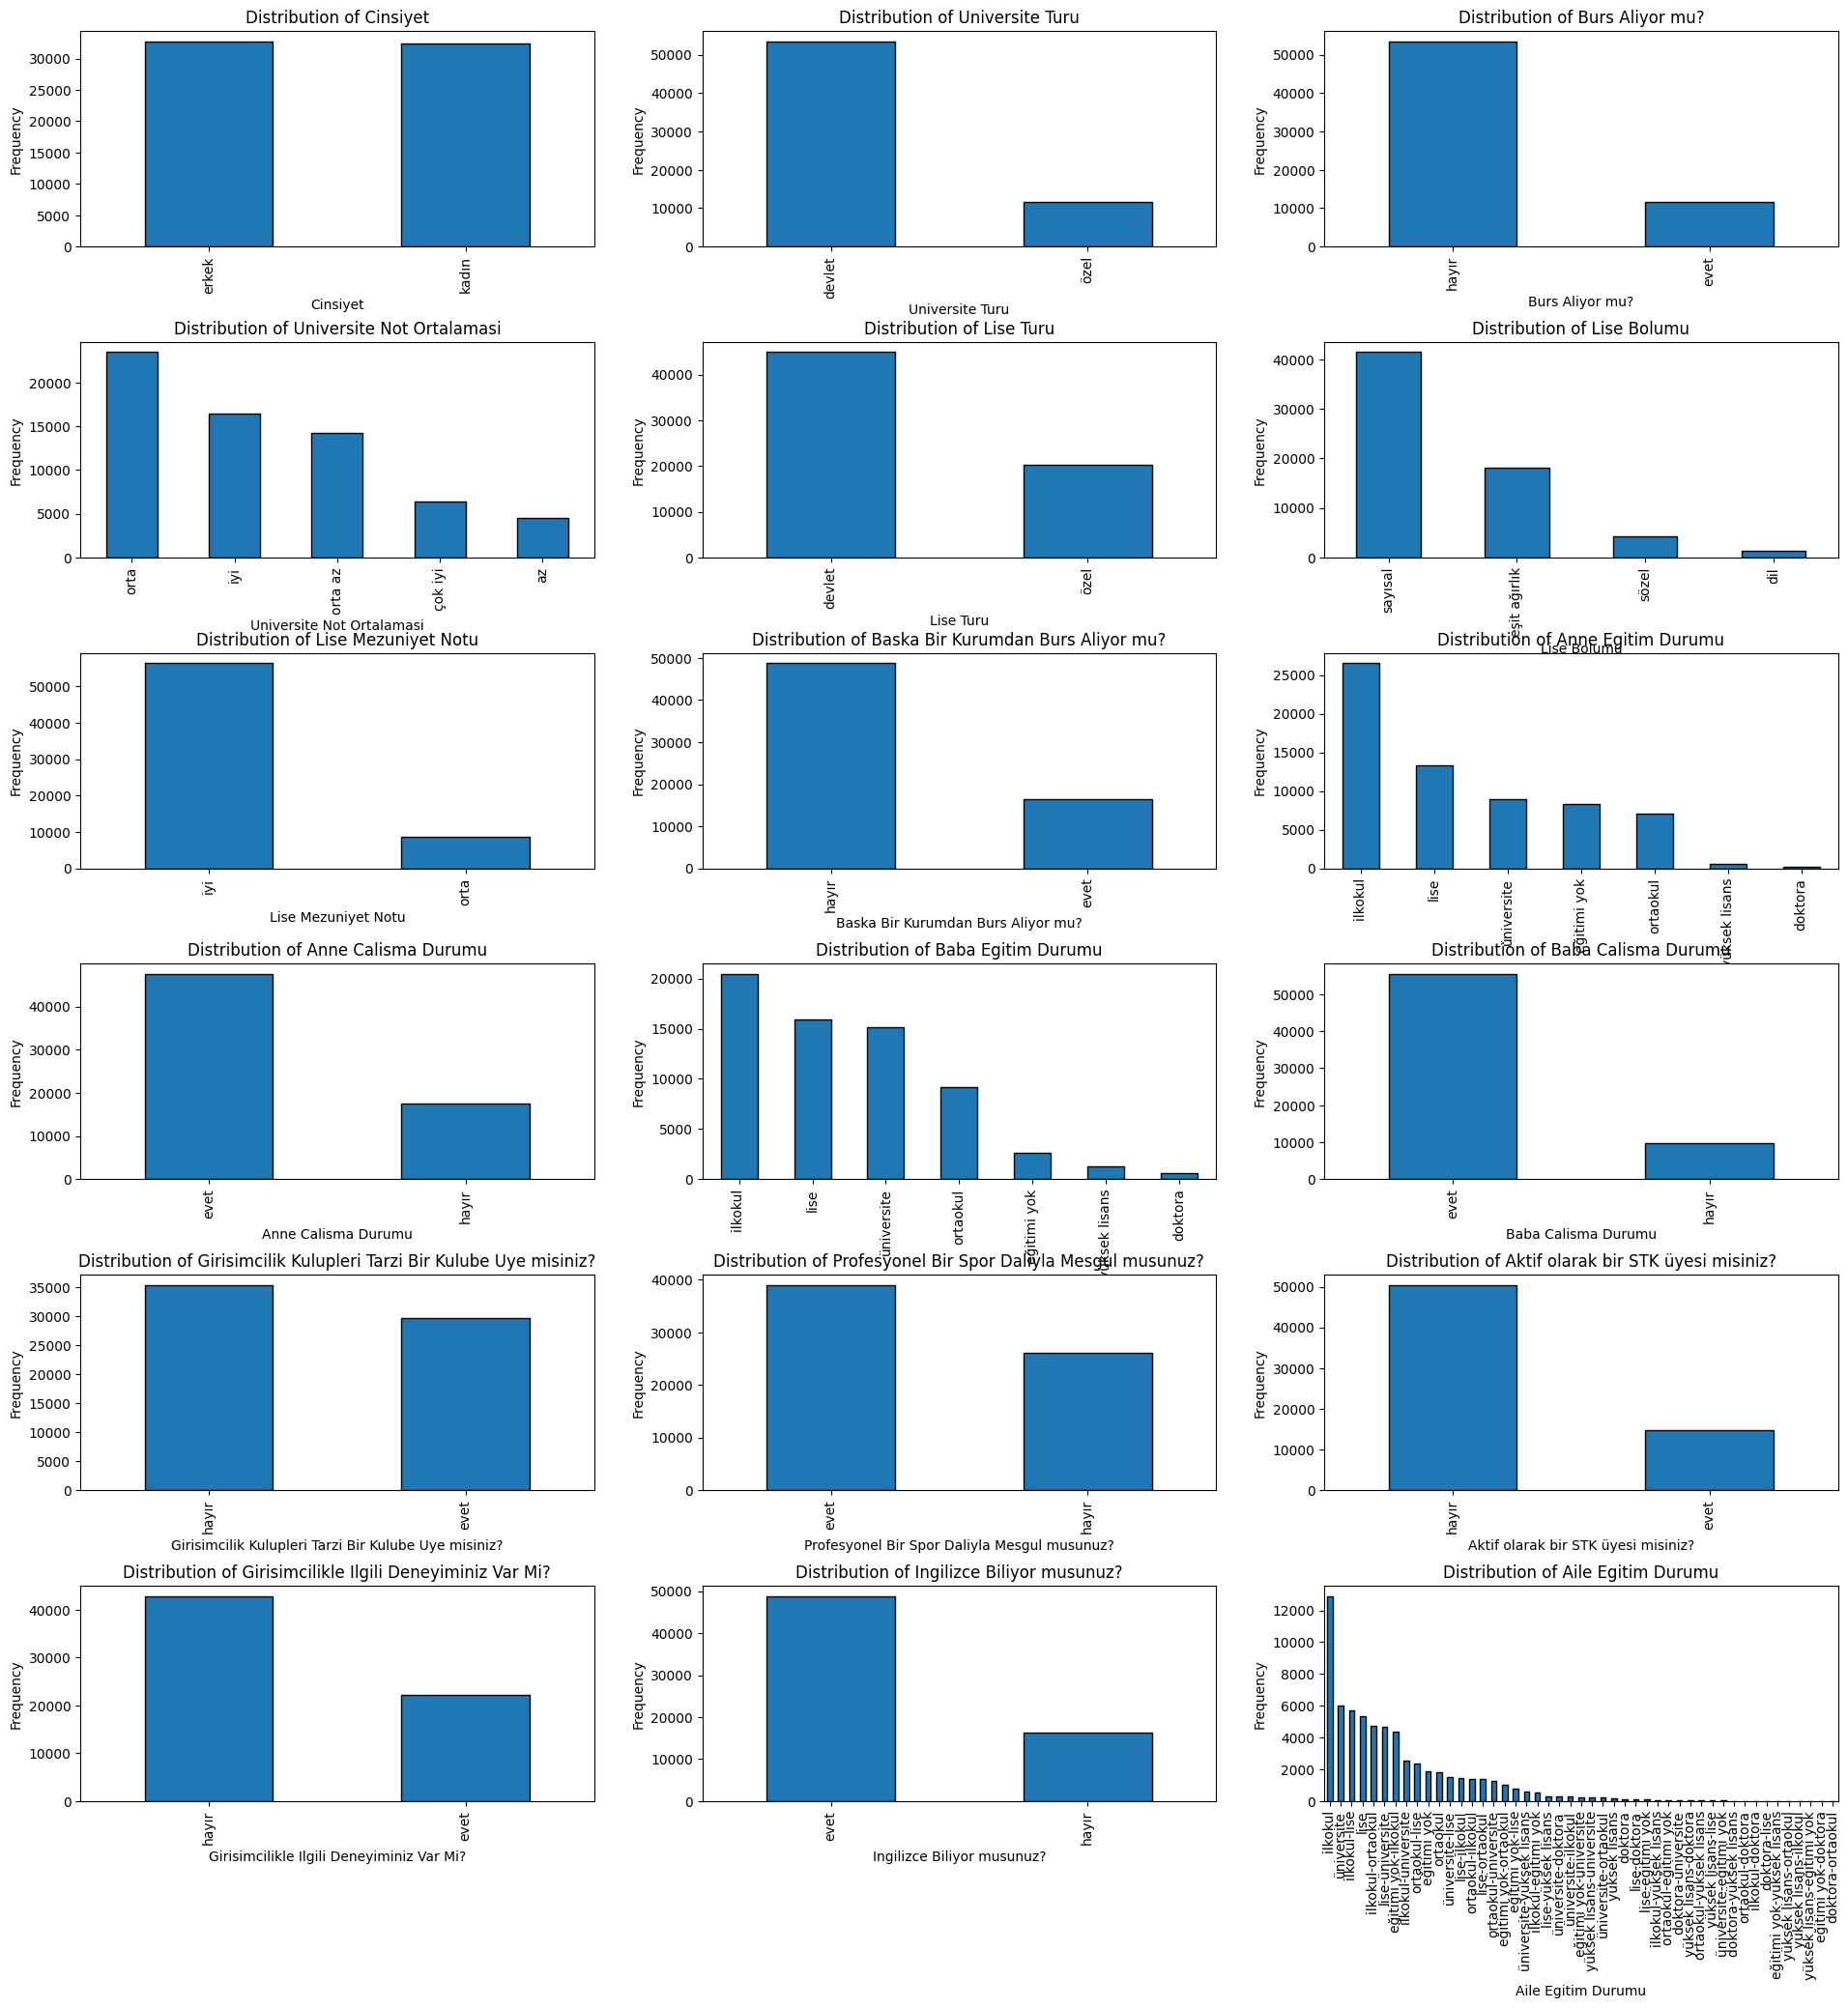

In [62]:
# Kategorik değişkenlerin dağılımını 6x3 şeklinde görselleştirelim
fig, axes = plt.subplots(6, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Düzgün bir şekilde yerleşim için index ayarı
for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 3)  # 6 satır ve 3 sütuna böl
    train_clean[column].value_counts().plot(kind='bar', ax=axes[row, col], edgecolor='black')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Kalan boş grafiklere boş eksen atayalım
for j in range(i+1, 6*3):
    row, col = divmod(j, 3)
    fig.delaxes(axes[row, col])

plt.show()


# Outlier Detection

In [63]:
# Aykırı değerleri IQR yöntemi ile bulan ve sayan bir fonksiyon oluşturalım
def detect_outliers_iqr(df, numeric_columns):
    # IQR hesaplaması
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Aykırı değer tespiti
    outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
    
    return outliers

# Fonksiyonu test etmek için veri üzerinde uygulayalım
numeric_columns = test_clean.select_dtypes(include=['float64', 'int64']).columns

outliers_detected_train = detect_outliers_iqr(train_clean, numeric_columns)
outliers_detected_test = detect_outliers_iqr(test_clean, numeric_columns)

# Sonucu gösterelim
outliers_detected_train , outliers_detected_test


(Basvuru Yili                   0
 Universite Kacinci Sinif    2649
 Kardes Sayisi                  0
 Yas                         1981
 dtype: int64,
 Basvuru Yili                  0
 Universite Kacinci Sinif    426
 Kardes Sayisi                 0
 Yas                         276
 dtype: int64)

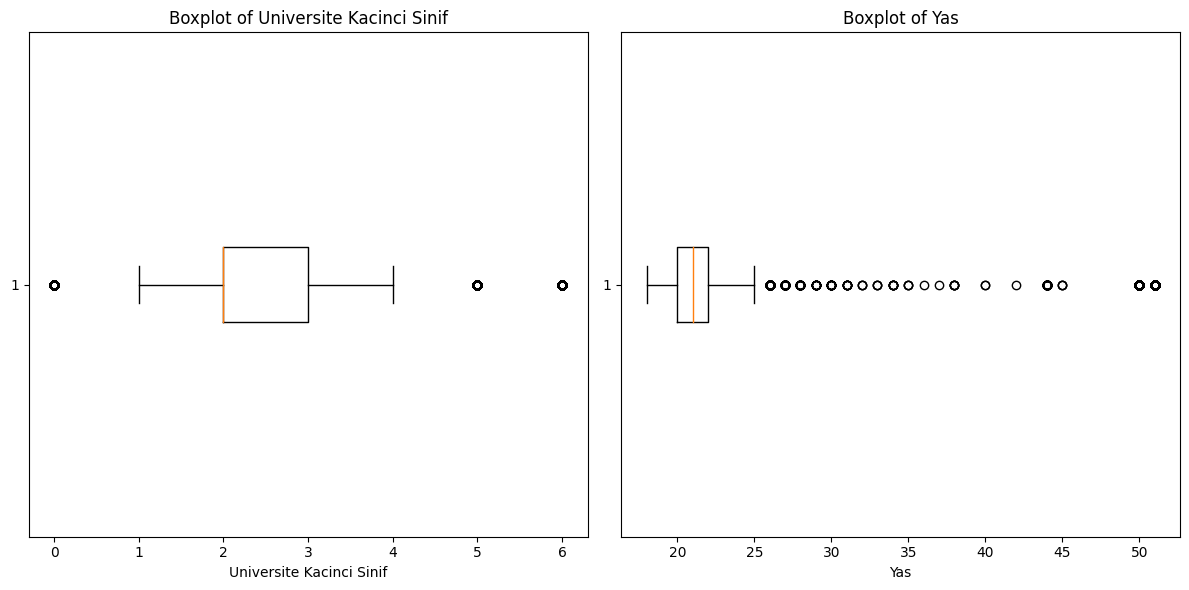

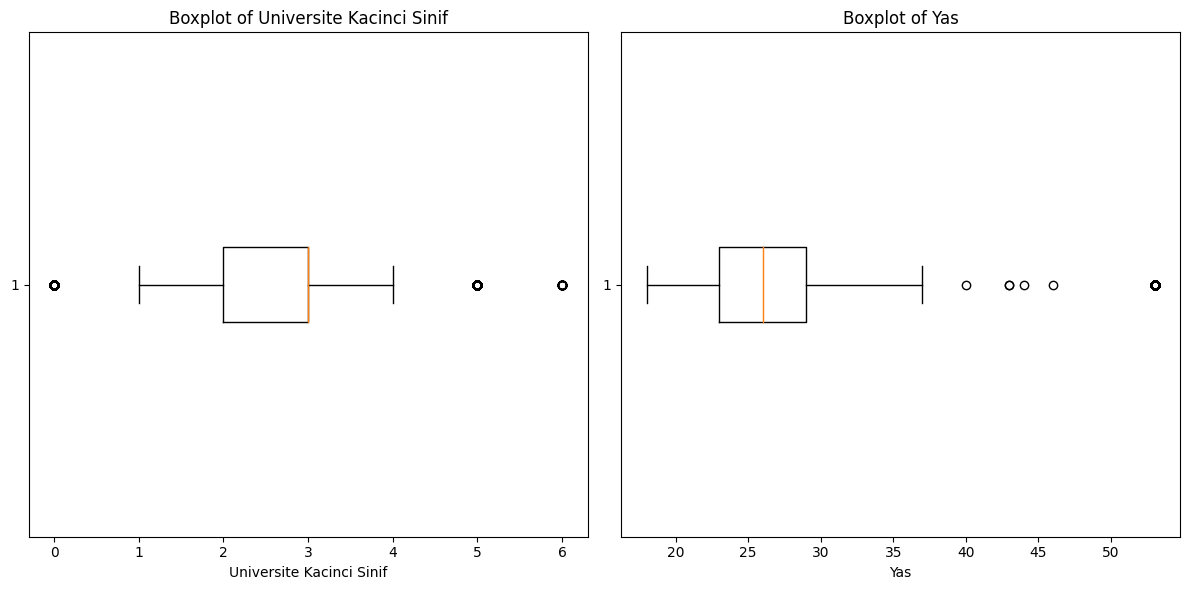

In [64]:
def visualize_boxplot(df, columns, figsize=(12, 6)):
    import matplotlib.pyplot as plt

    plt.figure(figsize=figsize)

    # Belirtilen sütunlar için boxplot görselleştirmesi
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        plt.boxplot(df[column].dropna(), vert=False)
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

visualize_boxplot(train_clean, ['Universite Kacinci Sinif', 'Yas'])
visualize_boxplot(test_clean, ['Universite Kacinci Sinif', 'Yas'])


In [65]:
from sklearn.ensemble import IsolationForest

# Yaş gruplarını belirleyelim
train_clean['Yas_grup_train'] = pd.cut(train_clean['Yas'], bins=[18, 25, 30, 35, 40], labels=['18-25', '25-30', '30-35', '35-40'])
test_clean['Yas_grup_test'] = pd.cut(test_clean['Yas'], bins=[18, 25, 30, 35, 40], labels=['18-25', '25-30', '30-35', '35-40'])

# Aykırı değerleri tespit edip ortanca ile değiştiren fonksiyon
def replace_outliers_corrected(df, group_column, target_columns):
    for col in target_columns:
        for group_name, group in df.groupby(group_column):
            iso_forest = IsolationForest(contamination=0.05, random_state=42)
            outliers = iso_forest.fit_predict(group[[col]])
            median_value = group[col].median()
            df.loc[group.index[outliers == -1], col] = median_value
    return df

# Hedef sütunlar: "Universite Kacinci Sinif" ve "Yas"
outlier_columns = ['Universite Kacinci Sinif', 'Yas']

# Aykırı değerlerin yerini grupların ortanca değeri ile değiştirelim
train_clean = replace_outliers_corrected(train_clean, 'Yas_grup_train', outlier_columns)
test_clean = replace_outliers_corrected(test_clean, 'Yas_grup_test', outlier_columns)

# Geçici oluşturduğumuz "YasGroup" sütununu silelim
train_clean.drop("Yas_grup_train", axis=1, inplace=True)
test_clean.drop("Yas_grup_test", axis=1, inplace=True)

# Sonucu görüntüleyelim
test_clean[['Universite Kacinci Sinif', 'Yas']].describe()


,Universite Kacinci Sinif,Yas
count,11049.000000,11049.000000
mean,2.595439,26.588198
std,1.010338,5.274818
min,0.000000,18.000000
25%,2.000000,23.000000
50%,3.000000,26.000000
75%,3.000000,29.000000
max,6.000000,53.000000


In [66]:
# Yas sütunu için özel olarak aykırı değerleri tespit edip median ile değiştirelim
def replace_outliers_for_age(df, column):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(df[[column]])
    median_value = df[column].median()
    df.loc[outliers == -1, column] = median_value
    return df

# Yas sütunundaki aykırı değerleri median ile değiştirelim
train_clean = replace_outliers_for_age(train_clean, 'Yas')
test_clean = replace_outliers_for_age(test_clean, 'Yas')


## Encoding

In [67]:
X = train_clean.drop('Degerlendirme Puani', axis=1)
y = train_clean['Degerlendirme Puani']
X.head()

,Basvuru Yili,Cinsiyet,Universite Turu,Burs Aliyor mu?,Universite Kacinci Sinif,Universite Not Ortalamasi,Lise Turu,Lise Bolumu,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Anne Egitim Durumu,Anne Calisma Durumu,Baba Egitim Durumu,Baba Calisma Durumu,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Aktif olarak bir STK üyesi misiniz?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Ingilizce Biliyor musunuz?,Yas,Aile Egitim Durumu
0,2014,erkek,özel,evet,3.0,iyi,devlet,sayısal,iyi,hayır,üniversite,hayır,üniversite,hayır,1.0,evet,evet,hayır,hayır,hayır,20.0,üniversite
1,2014,erkek,özel,evet,3.0,orta,devlet,sayısal,iyi,hayır,üniversite,evet,yüksek lisans,hayır,1.0,hayır,evet,hayır,evet,hayır,21.0,üniversite-yüksek lisans
2,2014,erkek,özel,evet,1.0,orta,devlet,sayısal,iyi,hayır,i̇lkokul,hayır,i̇lkokul,evet,4.0,evet,evet,hayır,hayır,hayır,21.0,i̇lkokul
3,2014,erkek,özel,evet,3.0,orta,devlet,sayısal,iyi,hayır,i̇lkokul,hayır,üniversite,hayır,4.0,evet,evet,hayır,hayır,hayır,23.0,i̇lkokul-üniversite
4,2014,erkek,özel,evet,2.0,orta,özel,eşit ağırlık,iyi,hayır,i̇lkokul,hayır,üniversite,hayır,1.0,hayır,evet,hayır,hayır,hayır,22.0,i̇lkokul-üniversite


### One Hot Encoding

In [68]:
one_hot_list = ["Cinsiyet" ,"Universite Turu" , "Burs Aliyor mu?" ,"Lise Turu" ,
                "Lise Bolumu" , "Baska Bir Kurumdan Burs Aliyor mu?" , "Anne Calisma Durumu" ,
                "Baba Calisma Durumu" , "Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?" ,
                "Profesyonel Bir Spor Daliyla Mesgul musunuz?" , "Aktif olarak bir STK üyesi misiniz?",
                "Girisimcilikle Ilgili Deneyiminiz Var Mi?" , "Ingilizce Biliyor musunuz?"]

In [69]:
X = pd.get_dummies(X, columns=one_hot_list, dtype='int64',drop_first=True)
test_clean = pd.get_dummies(test_clean, columns=one_hot_list, dtype='int64',drop_first=True)
test_clean.head()

,Basvuru Yili,Universite Kacinci Sinif,Universite Not Ortalamasi,Lise Mezuniyet Notu,Anne Egitim Durumu,Baba Egitim Durumu,Kardes Sayisi,Yas,Aile Egitim Durumu,Cinsiyet_kadın,Universite Turu_özel,Burs Aliyor mu?_hayır,Lise Turu_özel,Lise Bolumu_eşit ağırlık,Lise Bolumu_sayısal,Lise Bolumu_sözel,Baska Bir Kurumdan Burs Aliyor mu?_hayır,Anne Calisma Durumu_hayır,Baba Calisma Durumu_hayır,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?_hayır,Profesyonel Bir Spor Daliyla Mesgul musunuz?_hayır,Aktif olarak bir STK üyesi misiniz?_hayır,Girisimcilikle Ilgili Deneyiminiz Var Mi?_hayır,Ingilizce Biliyor musunuz?_hayır
0,2023,1.0,orta,orta,i̇lkokul,ortaokul,2.0,29.0,i̇lkokul-ortaokul,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,2023,1.0,az,iyi,i̇lkokul,i̇lkokul,3.0,30.0,i̇lkokul,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0
2,2023,1.0,az,orta,yüksek lisans,üniversite,0.0,26.0,yüksek lisans-üniversite,0,1,0,1,1,0,0,0,1,1,1,1,1,1,0
3,2023,1.0,az,iyi,i̇lkokul,lise,4.0,32.0,i̇lkokul-lise,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1
4,2023,3.0,iyi,iyi,üniversite,üniversite,1.0,31.0,üniversite,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0


### Ordinal encoding

In [70]:
def ordinal_encoding(df):
    df["Lise Mezuniyet Notu"].replace({
        "iyi" : 2,
        "orta" : 1
    }, inplace = True)

    df["Universite Not Ortalamasi"].replace({
        "iyi" : 4,
        "orta" : 3,
        "orta az": 2,
        "az":1,
        "çok iyi" :5
    }, inplace = True)

    df["Anne Egitim Durumu"].replace({
        "eğitimi yok" : 0,
        "i̇lkokul" : 1,
        "ortaokul": 2,
        "lise":3,
        "üniversite" :4,
        "yüksek lisans" : 5,
        "doktora": 6 
        }, inplace = True)

    df["Baba Egitim Durumu"].replace({
        "eğitimi yok" : 0,
        "i̇lkokul" : 1,
        "ortaokul": 2,
        "lise":3,
        "üniversite" :4,
        "yüksek lisans" : 5,
        "doktora": 6 
    }, inplace = True)
    
    return df

ordinal_encoding(X)
ordinal_encoding(test_clean)

,Basvuru Yili,Universite Kacinci Sinif,Universite Not Ortalamasi,Lise Mezuniyet Notu,Anne Egitim Durumu,Baba Egitim Durumu,Kardes Sayisi,Yas,Aile Egitim Durumu,Cinsiyet_kadın,Universite Turu_özel,Burs Aliyor mu?_hayır,Lise Turu_özel,Lise Bolumu_eşit ağırlık,Lise Bolumu_sayısal,Lise Bolumu_sözel,Baska Bir Kurumdan Burs Aliyor mu?_hayır,Anne Calisma Durumu_hayır,Baba Calisma Durumu_hayır,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?_hayır,Profesyonel Bir Spor Daliyla Mesgul musunuz?_hayır,Aktif olarak bir STK üyesi misiniz?_hayır,Girisimcilikle Ilgili Deneyiminiz Var Mi?_hayır,Ingilizce Biliyor musunuz?_hayır
0,2023,1.0,3,1,1,2,2.0,29.0,i̇lkokul-ortaokul,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,2023,1.0,1,2,1,1,3.0,30.0,i̇lkokul,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0
2,2023,1.0,1,1,5,4,0.0,26.0,yüksek lisans-üniversite,0,1,0,1,1,0,0,0,1,1,1,1,1,1,0
3,2023,1.0,1,2,1,3,4.0,32.0,i̇lkokul-lise,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1
4,2023,3.0,4,2,4,4,1.0,31.0,üniversite,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11044,2023,2.0,2,2,1,2,0.0,30.0,i̇lkokul-ortaokul,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0
11045,2023,3.0,4,2,1,1,3.0,26.0,i̇lkokul,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1
11046,2023,1.0,1,2,1,4,2.0,28.0,i̇lkokul-üniversite,0,0,1,1,0,1,0,1,1,0,0,0,0,1,0
11047,2023,4.0,2,2,1,2,2.0,31.0,i̇lkokul-ortaokul,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0


### Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluştur
label_encoder = LabelEncoder()

# Aile Egitim Durumu sütununa Label Encoding uygulayalım

X['Aile Egitim Durumu'] = label_encoder.fit_transform(X['Aile Egitim Durumu'])
test_clean['Aile Egitim Durumu'] = label_encoder.fit_transform(test_clean['Aile Egitim Durumu'])

# Kodlanan değerleri ve karşılıklarını gösterelim
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



In [72]:
test_clean.head()

,Basvuru Yili,Universite Kacinci Sinif,Universite Not Ortalamasi,Lise Mezuniyet Notu,Anne Egitim Durumu,Baba Egitim Durumu,Kardes Sayisi,Yas,Aile Egitim Durumu,Cinsiyet_kadın,Universite Turu_özel,Burs Aliyor mu?_hayır,Lise Turu_özel,Lise Bolumu_eşit ağırlık,Lise Bolumu_sayısal,Lise Bolumu_sözel,Baska Bir Kurumdan Burs Aliyor mu?_hayır,Anne Calisma Durumu_hayır,Baba Calisma Durumu_hayır,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?_hayır,Profesyonel Bir Spor Daliyla Mesgul musunuz?_hayır,Aktif olarak bir STK üyesi misiniz?_hayır,Girisimcilikle Ilgili Deneyiminiz Var Mi?_hayır,Ingilizce Biliyor musunuz?_hayır
0,2023,1.0,3,1,1,2,2.0,29.0,13,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
1,2023,1.0,1,2,1,1,3.0,30.0,9,1,0,1,0,1,0,0,1,1,0,1,0,1,1,0
2,2023,1.0,1,1,5,4,0.0,26.0,36,0,1,0,1,1,0,0,0,1,1,1,1,1,1,0
3,2023,1.0,1,2,1,3,4.0,32.0,12,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1
4,2023,3.0,4,2,4,4,1.0,31.0,37,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0


# Normalize Models

In [73]:
from sklearn.model_selection import train_test_split

# Let's split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [76]:
models_normalize_sensitive = {
    'Ridge Regression': Ridge().fit(X_train_scaled,y_train),
    'Lasso Regression': Lasso().fit(X_train_scaled,y_train),
    'K-Nearest Neighbors': KNeighborsRegressor().fit(X_train_scaled,y_train),
    'Support Vector Regression (SVR)': SVR().fit(X_train_scaled,y_train)
}

# Model Evaluation Normalize Models

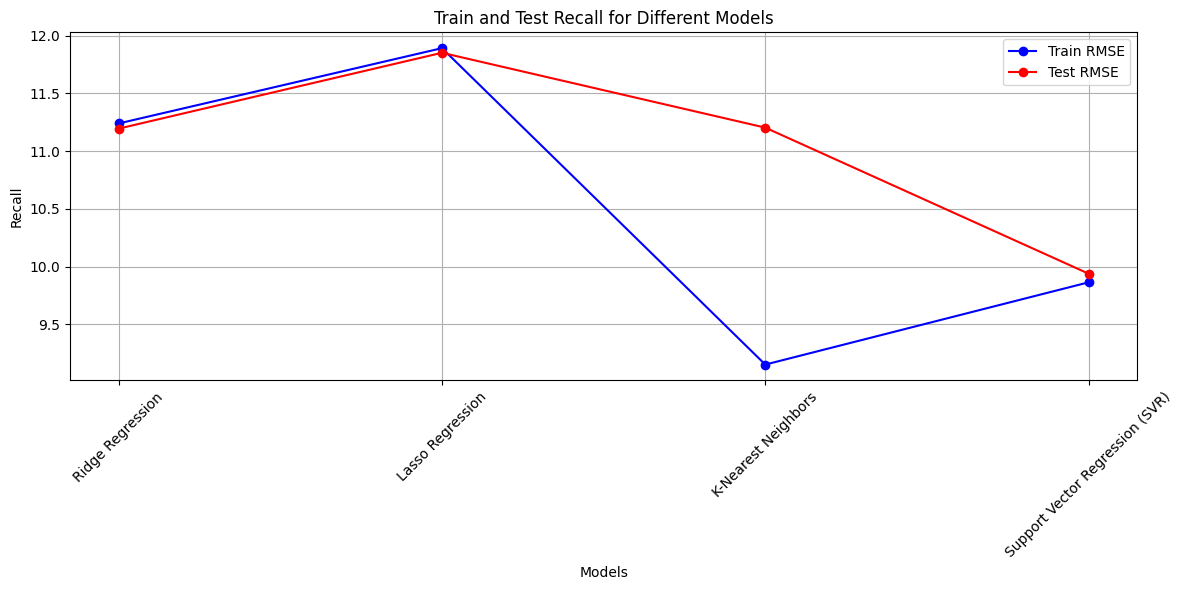

In [78]:

from sklearn.metrics import mean_squared_error

# Lists to store results
rmse_scores_test = []
rmse_scores_train = []
model_names = []

# Get recall scores for each model
for name, model in models_normalize_sensitive.items():
    
    # Make a prediction (Using trained models in hyperparameter optimization)
    y_pred_normalize = model.predict(X_test_scaled)
    y_pred_train_normalize = model.predict(X_train_scaled)
    
    # Calculate and save recall scores
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_normalize))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_normalize))
    
    
    rmse_scores_test.append(rmse_test)
    rmse_scores_train.append(rmse_train)
    model_names.append(name)

# Let's visualize the recall scores on the same graph
plt.figure(figsize=(12, 6))

plt.plot(model_names, rmse_scores_train, marker='o',
         linestyle='-', color='b', label='Train RMSE')
plt.plot(model_names, rmse_scores_test, marker='o',
         linestyle='-', color='r', label='Test RMSE')

plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Train and Test Recall for Different Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Non Normalize Models

In [82]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor



In [83]:

models_non_tree = {
    'Decision Tree': DecisionTreeRegressor(random_state=42).fit(X_train,y_train),
    'Random Forest': RandomForestRegressor(random_state=42).fit(X_train,y_train),
    'AdaBoost': AdaBoostRegressor(random_state=42).fit(X_train,y_train),
    'CatBoost': CatBoostRegressor(random_state=42).fit(X_train,y_train),
    'LightGBM': LGBMRegressor(random_state=42).fit(X_train,y_train),
    'Gradient Boosting (GBM)': GradientBoostingRegressor(random_state=42).fit(X_train,y_train),
    'XGBoost': XGBRegressor(random_state=42).fit(X_train,y_train)
}


Learning rate set to 0.076461
0:	learn: 17.1402711	total: 63ms	remaining: 1m 2s
1:	learn: 16.2480852	total: 71.6ms	remaining: 35.7s
2:	learn: 15.4511070	total: 78.8ms	remaining: 26.2s
3:	learn: 14.7492273	total: 86.1ms	remaining: 21.4s
4:	learn: 14.0946518	total: 93.7ms	remaining: 18.7s
5:	learn: 13.5304529	total: 101ms	remaining: 16.7s
6:	learn: 13.0052207	total: 108ms	remaining: 15.4s
7:	learn: 12.5385776	total: 115ms	remaining: 14.3s
8:	learn: 12.1319931	total: 122ms	remaining: 13.5s
9:	learn: 11.7595060	total: 129ms	remaining: 12.8s
10:	learn: 11.4296632	total: 136ms	remaining: 12.3s
11:	learn: 11.1238187	total: 143ms	remaining: 11.8s
12:	learn: 10.8797625	total: 150ms	remaining: 11.4s
13:	learn: 10.6338377	total: 158ms	remaining: 11.1s
14:	learn: 10.3941402	total: 166ms	remaining: 10.9s
15:	learn: 10.1868053	total: 173ms	remaining: 10.6s
16:	learn: 10.0243785	total: 180ms	remaining: 10.4s
17:	learn: 9.8625175	total: 188ms	remaining: 10.2s
18:	learn: 9.7100880	total: 195ms	remainin

# Model Evaluation Non Normalize model

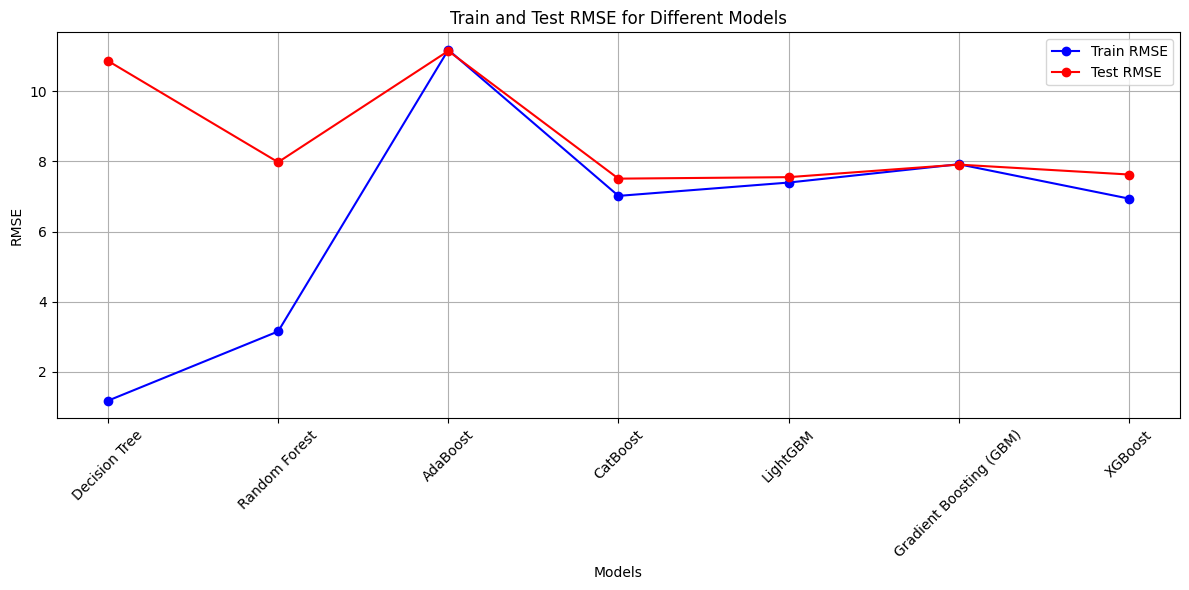

In [84]:

# Lists to store results
rmse_scores_test = []
rmse_scores_train = []
model_names = []

# Get recall scores for each model
for name, model in models_non_tree.items():
    
    # Make a prediction (Using trained models in hyperparameter optimization)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate and save recall scores
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    
    
    rmse_scores_test.append(rmse_test)
    rmse_scores_train.append(rmse_train)
    model_names.append(name)

# Let's visualize the recall scores on the same graph
plt.figure(figsize=(12, 6))

plt.plot(model_names, rmse_scores_train, marker='o',
         linestyle='-', color='b', label='Train RMSE')
plt.plot(model_names, rmse_scores_test, marker='o',
         linestyle='-', color='r', label='Test RMSE')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE for Different Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


***Hiperparametre optimizasyonu ile pürüzler giderilebilir ..***